# Quantum Process Tomography Benchmarks, Analysis

In [62]:
import sys
sys.path.insert(0, '../../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix, random_unitary
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm

from loss_functions import *
from optimization import *
from quantum_channel import *
from kraus_channels import *
from lindblad_channels import *
from quantum_tools import *
from experimental import *
from spam import *

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

#import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

## Loss During Training

In [79]:
model_list1 = loader("data/three_qubit_benchmark.model")
channel_target1 = loader("data/three_qubit_channel_target.model")

model_list2 = loader("data/four_qubit_benchmark.model")
channel_target2 = loader("data/four_qubit_channel_target.model")

In [80]:
r_loss1 = [model.logger.loss_train_list for model in model_list1]
fid_loss1 = [model.logger.loss_val_list for model in model_list1]

r_loss1 = np.array(r_loss1).T
fid_loss1 = np.array(fid_loss1).T

r_loss2 = [model.logger.loss_train_list for model in model_list2]
fid_loss2 = [model.logger.loss_val_list for model in model_list2]

r_loss2 = np.array(r_loss2).T
fid_loss2 = np.array(fid_loss2).T

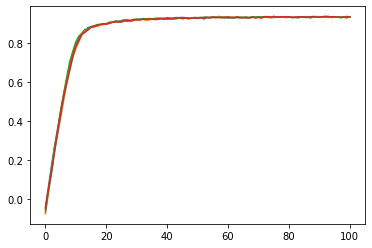

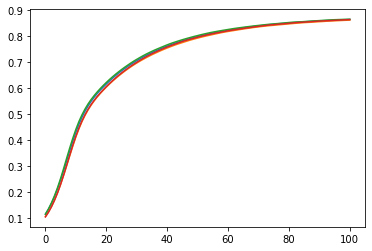

In [81]:
plt.plot(r_loss1)
plt.show()
plt.plot(-fid_loss1)
plt.show()

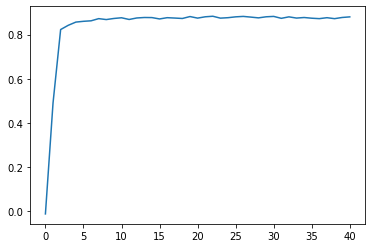

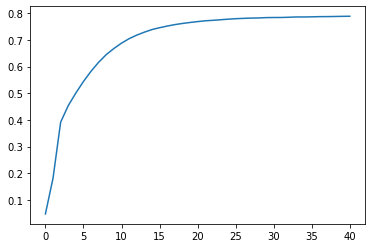

In [82]:
plt.plot(r_loss2)
plt.show()
plt.plot(-fid_loss2)
plt.show()

## Retrieved Quantum Spectra

In [83]:
spectrum_model1 = [channel_spectrum(model.channel) for model in model_list1]
spectrum_target1 = channel_spectrum(channel_target1)

spectrum_model2 = [channel_spectrum(model.channel) for model in model_list2]
spectrum_target2 = channel_spectrum(channel_target2)

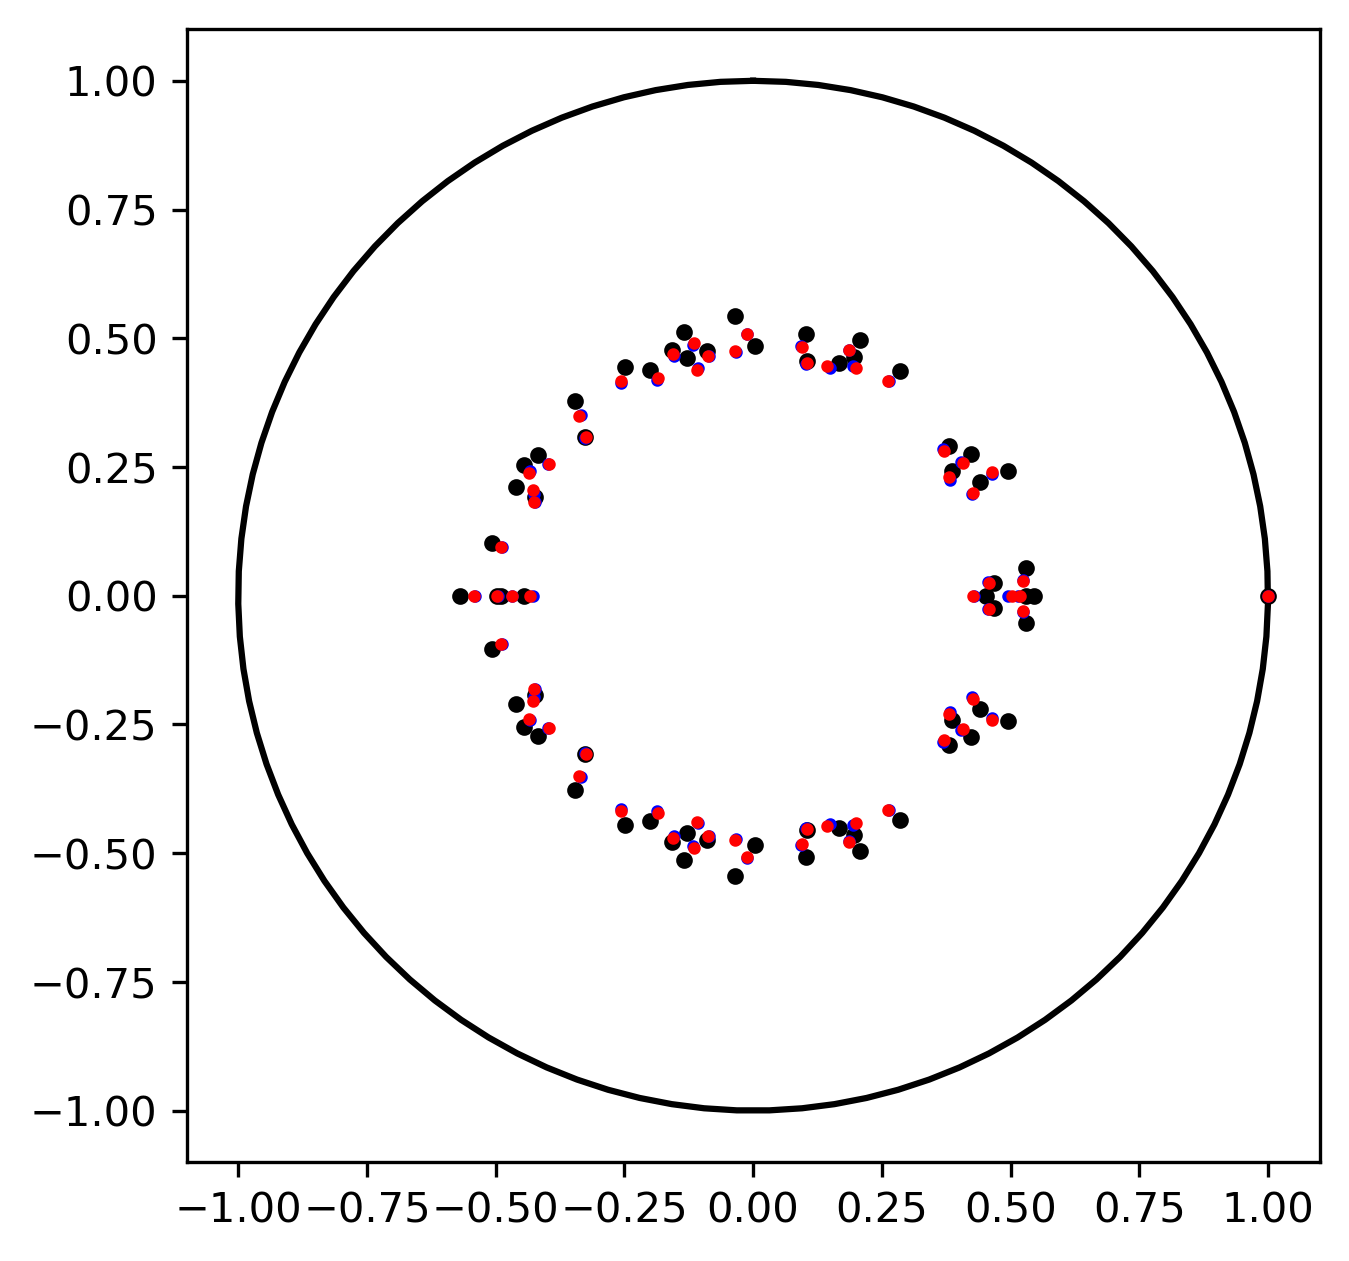

In [84]:
t = np.linspace(0, 2*np.pi, 100)
circle = [np.sin(t), np.cos(t)]

fig = plt.figure(figsize=(5,5), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle, "k")

plt.plot(spectrum_target1[:,0], spectrum_target1[:,1], "ko", markersize=3)
plt.plot(spectrum_model1[0][:,0], spectrum_model1[0][:,1], "bo", markersize=2)
plt.plot(spectrum_model1[1][:,0], spectrum_model1[1][:,1], "ro", markersize=2)


plt.show()

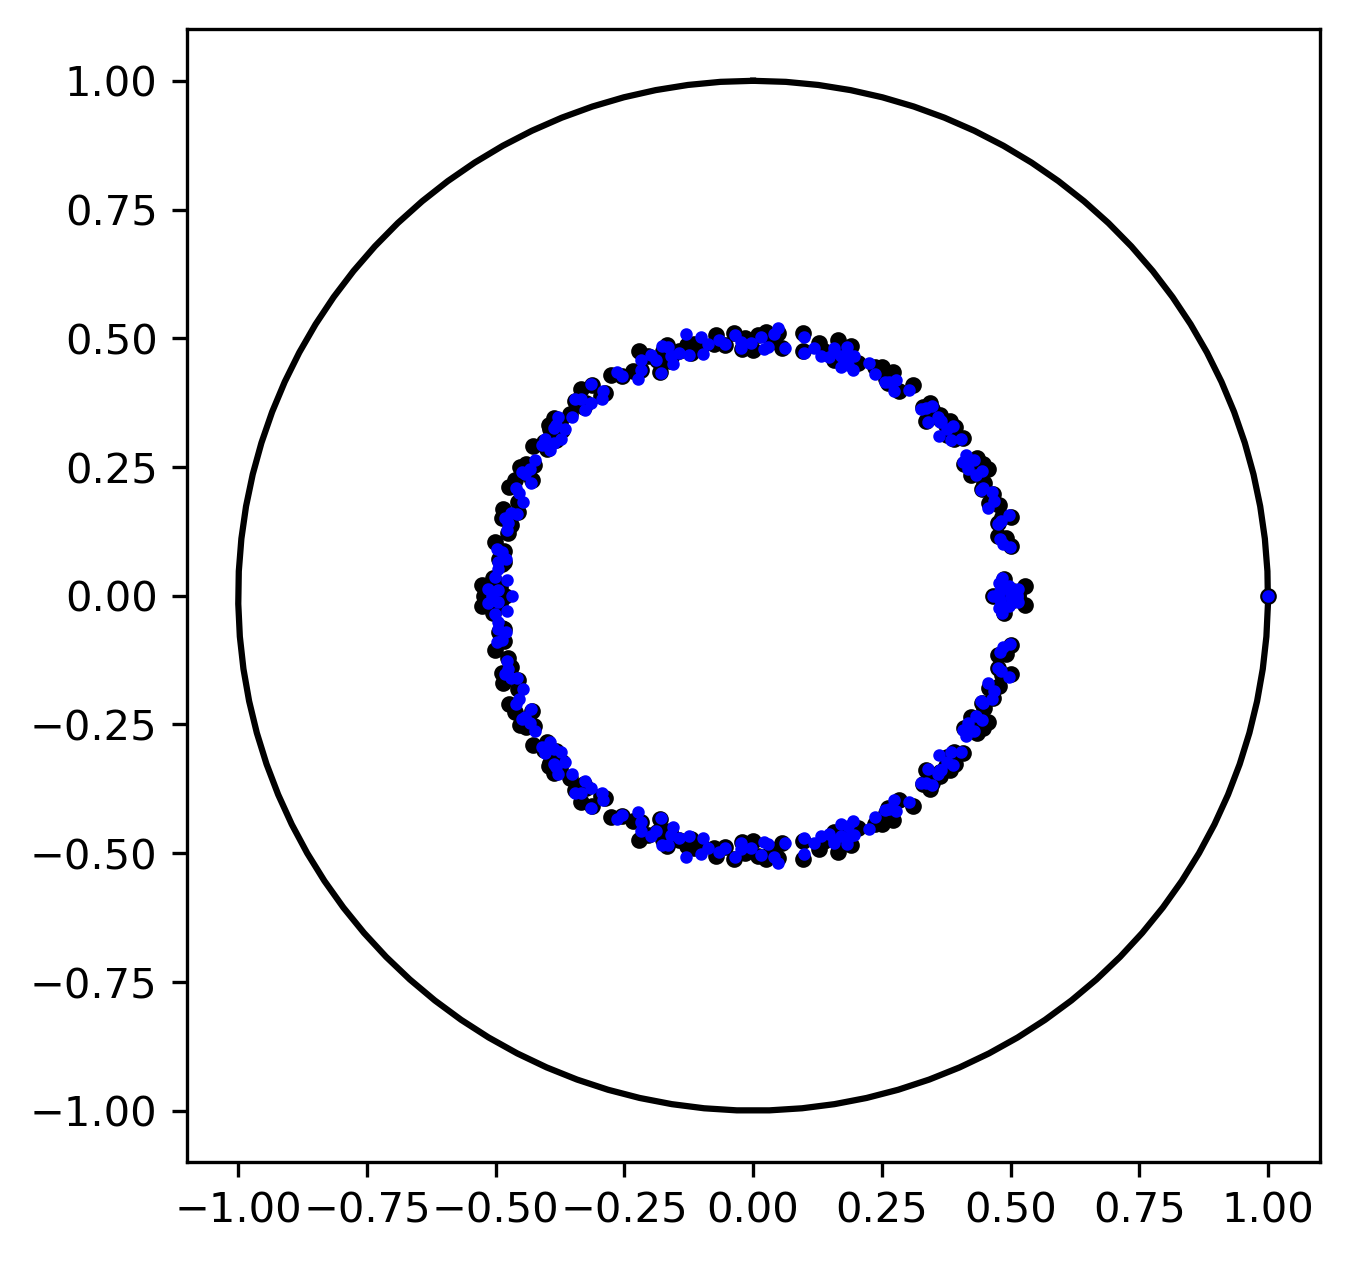

In [78]:
t = np.linspace(0, 2*np.pi, 100)
circle = [np.sin(t), np.cos(t)]

fig = plt.figure(figsize=(5,5), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle, "k")

plt.plot(spectrum_target2[:,0], spectrum_target2[:,1], "ko", markersize=3)
plt.plot(spectrum_model2[0][:,0], spectrum_model2[0][:,1], "bo", markersize=2)


plt.show()